We will start by downloading a sample mesh for the geometric texture that we would like to synthesize.   !下载想要迁移的风格模型!

In [19]:
import constants  #对应的py文件
from process_data import files_utils

target_path = f'{constants.DATA_ROOT}/cloud.zip'
files_utils.download_file_from_google_drive('1e9vpySX4WUic09JGk7-LV_h8V6H4Nb_I', target_path)
files_utils.decompress_data(target_path)


ConnectionError: HTTPSConnectionPool(host='docs.google.com', port=443): Max retries exceeded with url: /uc?export=download&id=1e9vpySX4WUic09JGk7-LV_h8V6H4Nb_I (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x000001FB47E70710>: Failed to establish a new connection: [WinError 10060] 由于连接方在一段时间后没有正确答复或连接的主机没有反应，连接尝试失败。',))

Lets have a look on our *reference* texture.

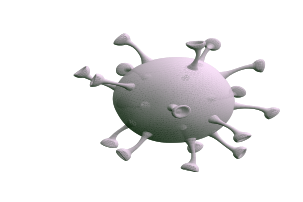

In [1]:
%matplotlib inline
from process_data import mesh_plotter
import matplotlib.pyplot as plt

mesh_plotter.plot_mesh(f'/home/maxiqq/projects/dgts/dataset/dropbox_raw/covid.obj')


Now, we will create our training data. This will take ~1 hour.

In [4]:
import os

PROJECT_ROOT = "/home/maxiqq/projects"
print (PROJECT_ROOT)

/home/maxiqq/projects


In [4]:
#自己试验
class Options:

    @property                        #添加@property后，这个方法（函数）就变成了一个属性 https://zhuanlan.zhihu.com/p/64487092
    def name(self) -> str:
        return f'mesh_name_tag' #表明函数name的返回值（return）是字符串类型str 
                            
    @property
    def cp_folder(self) -> str:                             
        return f'checkpoints/{self.name}'
    
a=Options()
print(a.name)a
print(a.cp_folder)

mesh_name_tag
checkpoints/mesh_name_tag


In [5]:
#自己试验
import constants

class Options:

    @property
    def cp_folder(self) -> str:                             
        return f'{constants.PROJECT_ROOT}/checkpoints/self.name'
    
a=Options()
print(a.cp_folder)

/home/maxiqq/projects/checkpoints/self.name


In [ ]:
#将病毒的风格迁移到小牛身上

from custom_types import CUDA, CPU
from process_data.ground_truth_optimization import GroundTruthGenerator
import options

args = options.GtOptions(tag='demo', mesh_name='covid', template_name='ball', num_levels=6)
device =  CUDA(0)
gt_gen = GroundTruthGenerator(args, device)
gt_gen.generate_ground_truth_meshes()
#应该就是在options里面改路径！！


Loading faiss with AVX2 support.
covid_demo Level: 0:   0%|          | 0/3000 [00:00<?, ?it/s]

Our *ground truth* training sequence:

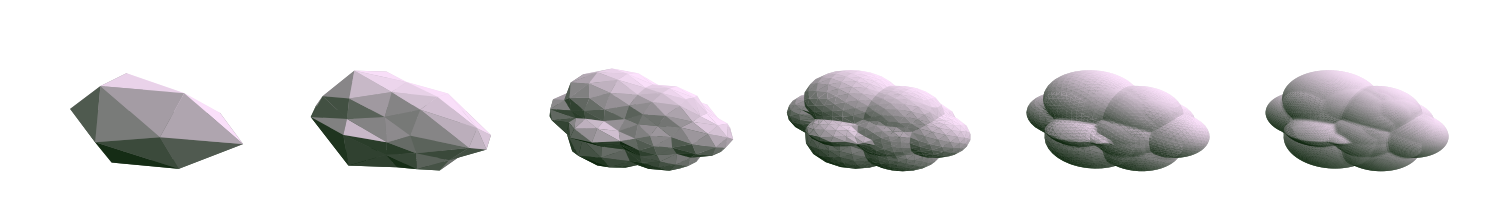

In [3]:
gt_paths = [f'{constants.DATA_ROOT}/cloud/cloud_level{i:02d}.obj' for i in range(6)]
mesh_plotter.plot_mesh(*gt_paths)

Finally we can train a *deep geometric texture synthesis* model. This will take ~2 hours.

In [4]:
from training import Trainer

args = options.TrainOption(tag='demo', mesh_name='cloud', template_name='sphere', num_levels=6)
trainer = Trainer(args, device)
trainer.train()

cloud_demo Level: 0:   0%|          | 0/2000 [00:00<?, ?it/s]

init SingleMeshGenerator model
init SingleMeshDiscriminator model


cloud_demo Level: 5: 100%|██████████| 2000/2000 [46:08<00:00,  1.34s/it, d_fake=-.126, d_real=-.0491, g_fake=-.126, g_rec=0.00209]  


Now we can use our model to synthesize the geometric texture on other meshes!

loading options from /home/amir/projects/geometric-textures/checkpoints/cloud_demo/options.pkl
loading SingleMeshGenerator model from /home/amir/projects/geometric-textures/checkpoints/cloud_demo/SingleMeshGenerator.pth


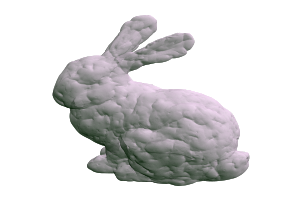

In [3]:
from dgts_base import Mesh2Mesh
from process_data import mesh_utils

m2m = Mesh2Mesh(args, CPU)
mesh = mesh_utils.load_real_mesh('bunny', 0, True)
out = m2m(mesh, 2, 5, 0)
out.plot()

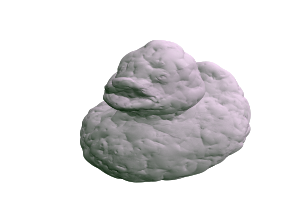

In [2]:
mesh = mesh_utils.load_real_mesh('duck', 0, True)
out = m2m(mesh, 2, 5, 0)
out.plot()